In [6]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

1. Read the data as an appropriate Time Series data and plot the data.

In [8]:
dfr = pd.read_csv("Rose.csv")

In [9]:
#Display the first 5 Rows
dfr.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [10]:
dfr.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


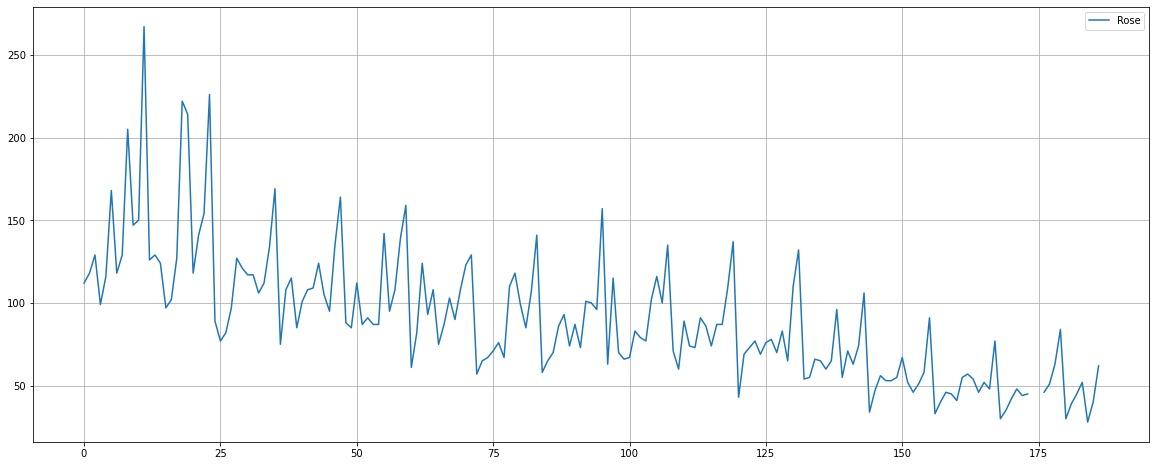

In [11]:
#plot the time series data
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
dfr.plot();
plt.grid();

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the XAxis as a Time Series, we need to pass the date range manually through a command in

In [12]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [13]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [14]:
dfr['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
dfr.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [15]:
dfr['Time_Stamp'] = pd.to_datetime(dfr['Time_Stamp'])

In [16]:
dfr = dfr.set_index('Time_Stamp')
dfr.drop(['YearMonth'], axis=1, inplace=True)
dfr.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


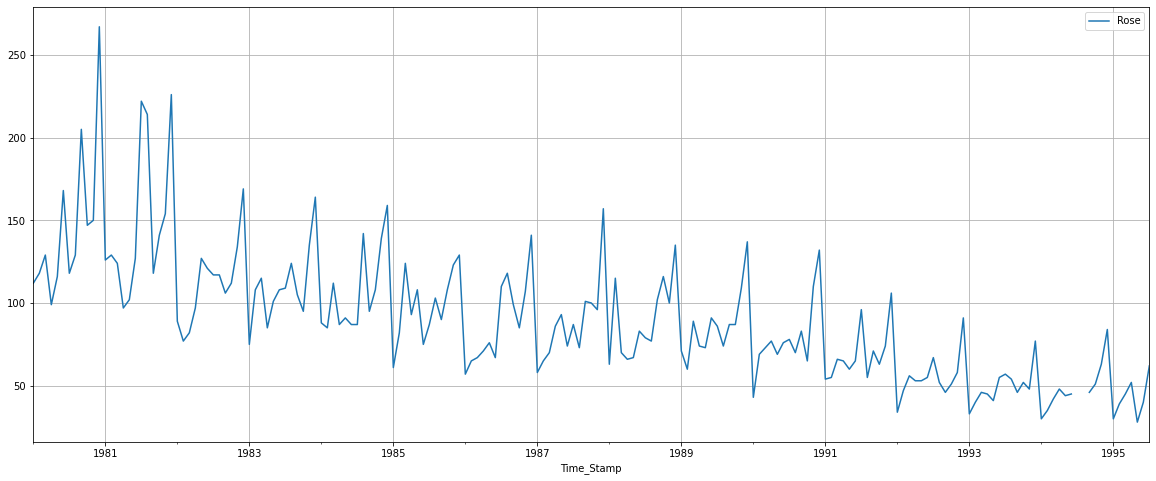

In [17]:
#plot the time series data
dfr.plot();
plt.grid();

We can see that there is a no trend but there is a seasonal pattern is associated

2. Perform appropriate Exploratory Data Analysis to understand the data and
also perform decomposition.


In [18]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [19]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = dfr.isnull().sum()[dfr.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv[in])

SyntaxError: invalid syntax (<ipython-input-19-643c7dfbcbe7>, line 9)

In [20]:
#List down rows with null values
dfr[dfr['Rose'].isna()]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


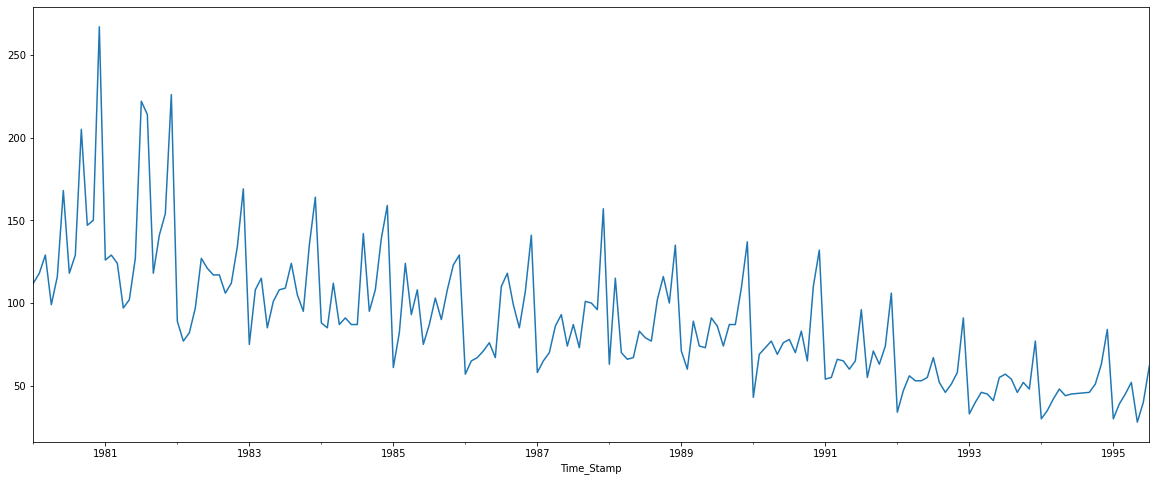

In [21]:
dfr['Rose'].interpolate('linear').plot()

In [22]:
dfr = dfr.resample('M').mean().interpolate('linear')
dfr[(dfr.index >= '1994-07-31')&(dfr.index <= '1994-08-31')]

,Rose
Time_Stamp,
1994-07-31,45.333333
1994-08-31,45.666667


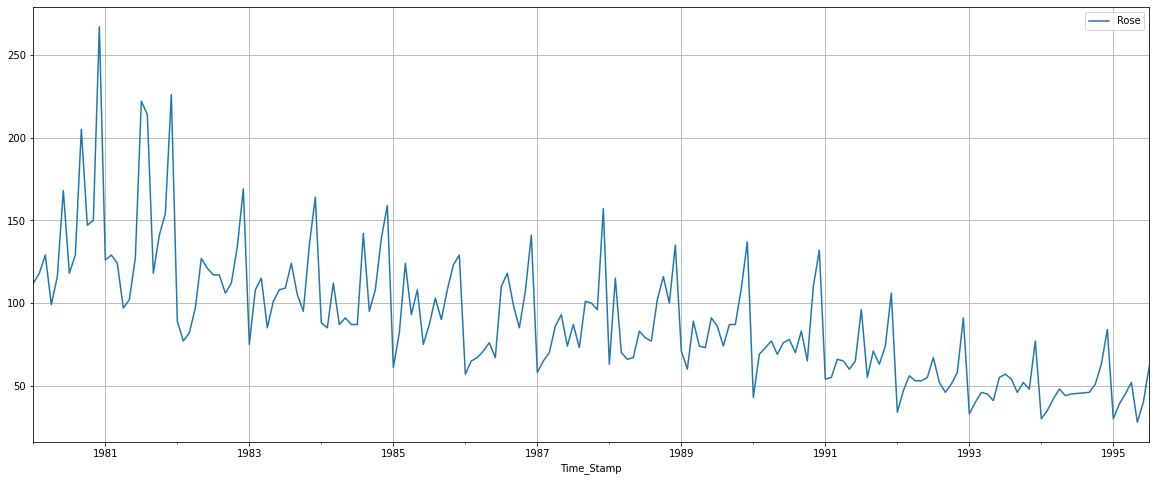

In [23]:
dfr.plot();
plt.grid();

In [24]:
dfr.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


Plot a boxplot to understand the spread of sales across different years and
within different months across years.

The basic measures of descriptive statistics tell us how the wine sales have varied across years. But remember,
for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

Yearly Boxplot

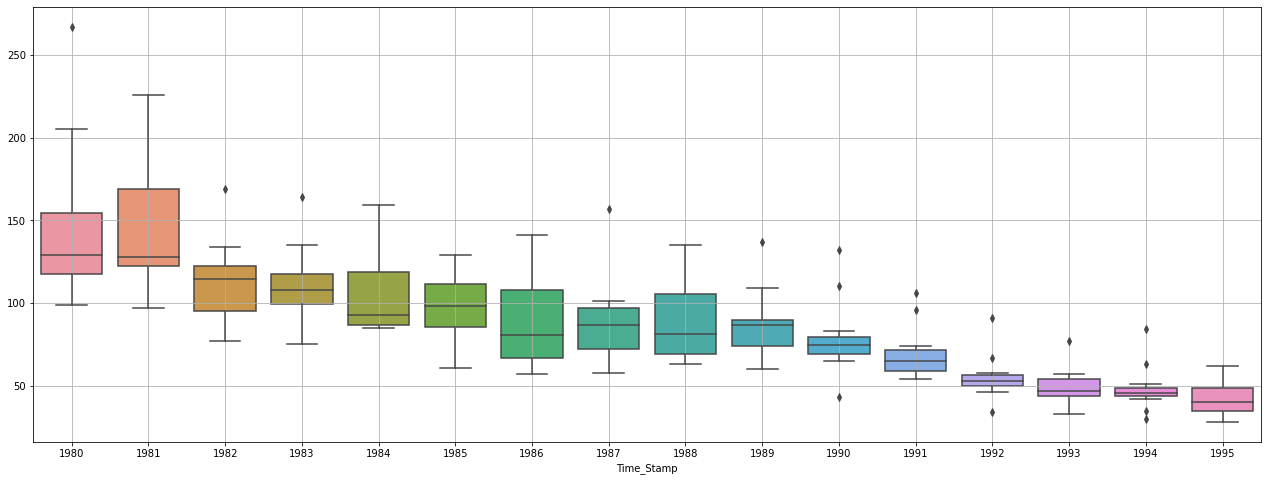

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfr.index.year,y = dfr.values[:,0],ax=ax)
plt.grid();

The yearly boxplots also shows that the there is no trend on the Sales

Monthly Boxplot

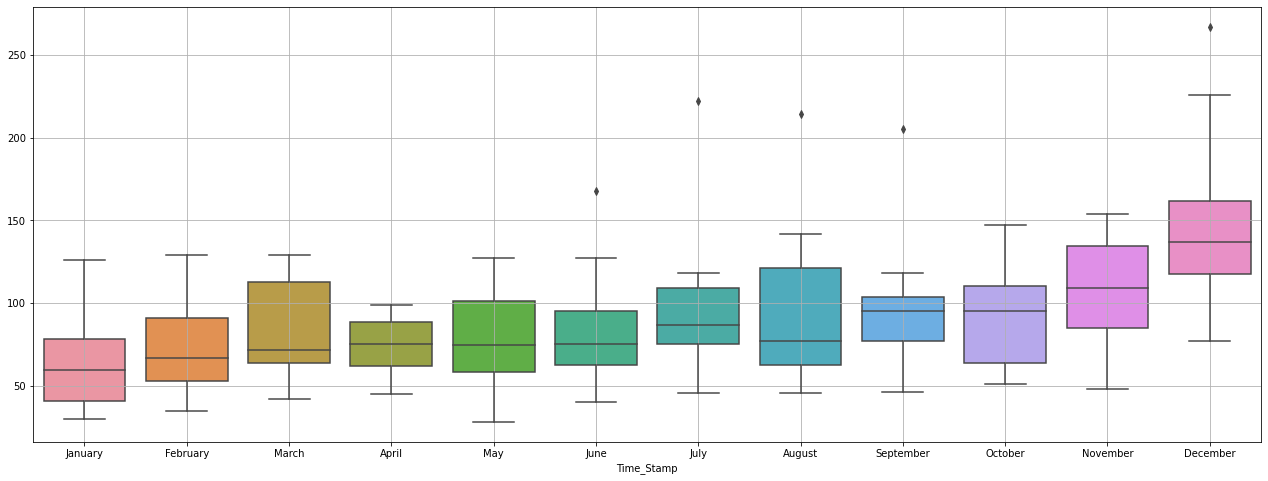

In [26]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfr.index.month_name(),y = dfr.values[:,0],ax=ax)
plt.grid();

There is a clear distinction of 'Rose’ Sales within different months spread across various years. The highest
such numbers are being recorded in the month of August-December across various years.

Plot a time series monthplot to understand the spread of accidents across
different years and within different months across years.


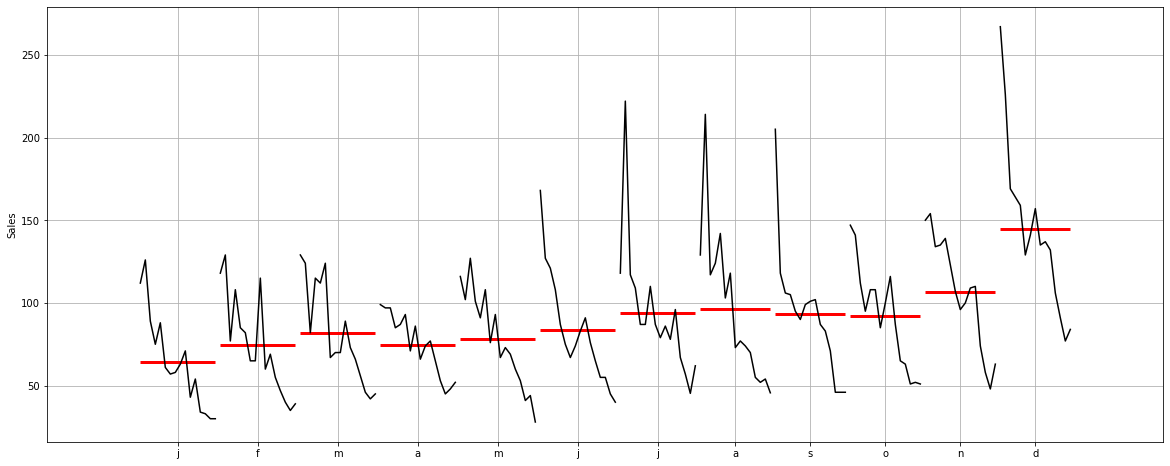

In [27]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(dfr['Rose'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series (sales of 'Rose' in this case) across various months. The
red line is the median value.

Plot a graph of monthly 'Rose' Sales across years.

In [28]:
monthly_sales_across_years = pd.pivot_table(dfr, values = 'Rose', index = dfr.index)
monthly_sales_across_years

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0
...,...
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0


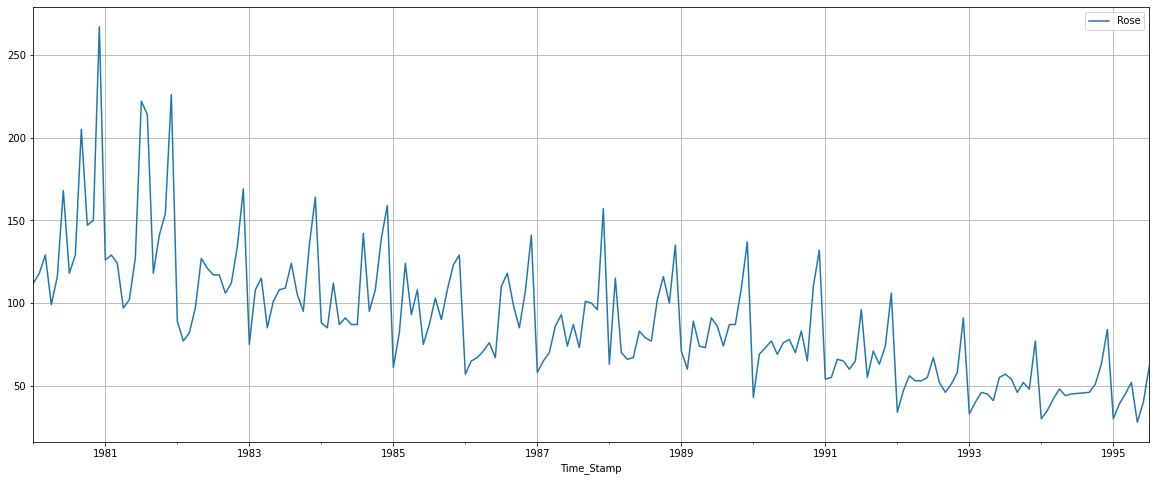

In [29]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

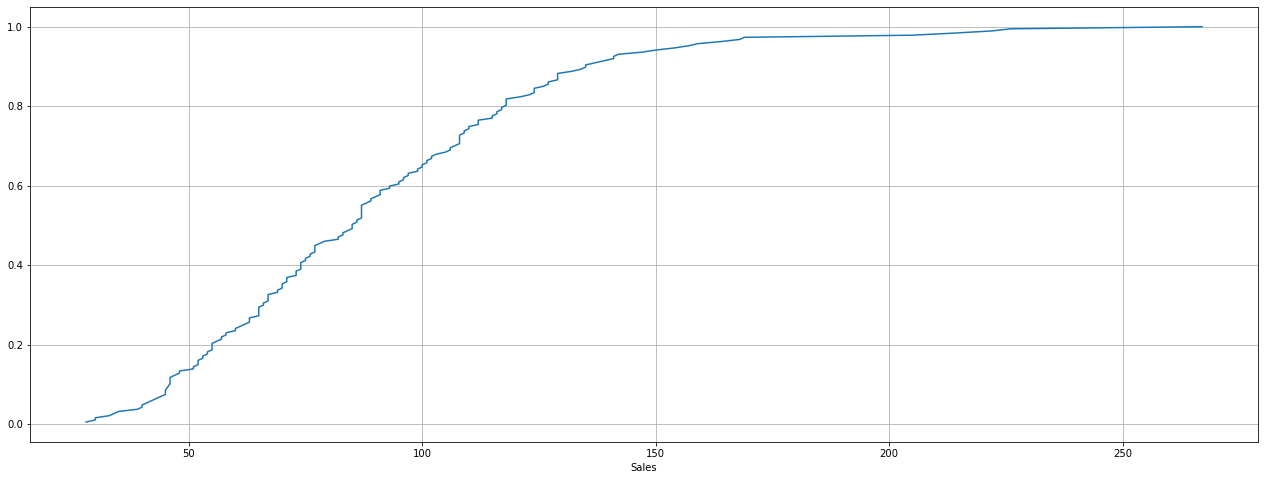

In [30]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (22, 8))
cdf = ECDF(dfr['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

Plot the average sales of Rose wine per month and the month on month
percentage change of Rose Sales

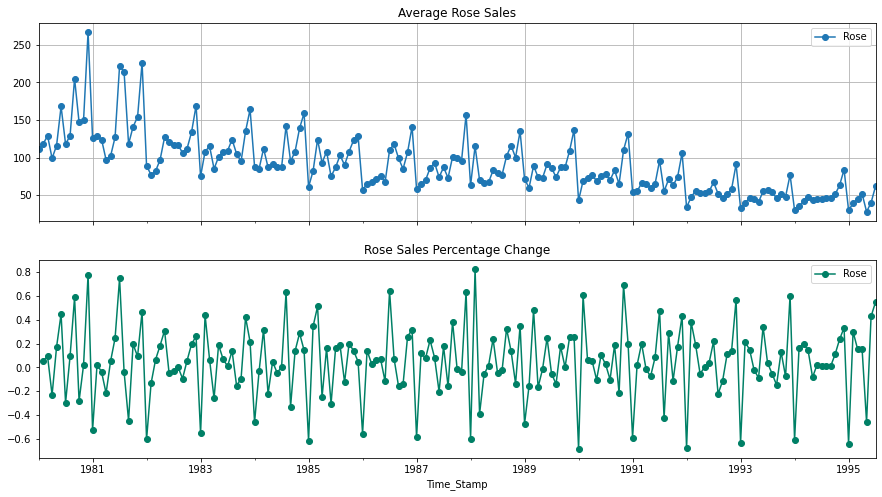

In [31]:
# group by date and get average RetailSales, and precent change
average = dfr.groupby(dfr.index)["Rose"].mean()
pct_change = dfr.groupby(dfr.index)["Rose"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percentage Change")

Decompose the Time Series and plot the different components.

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

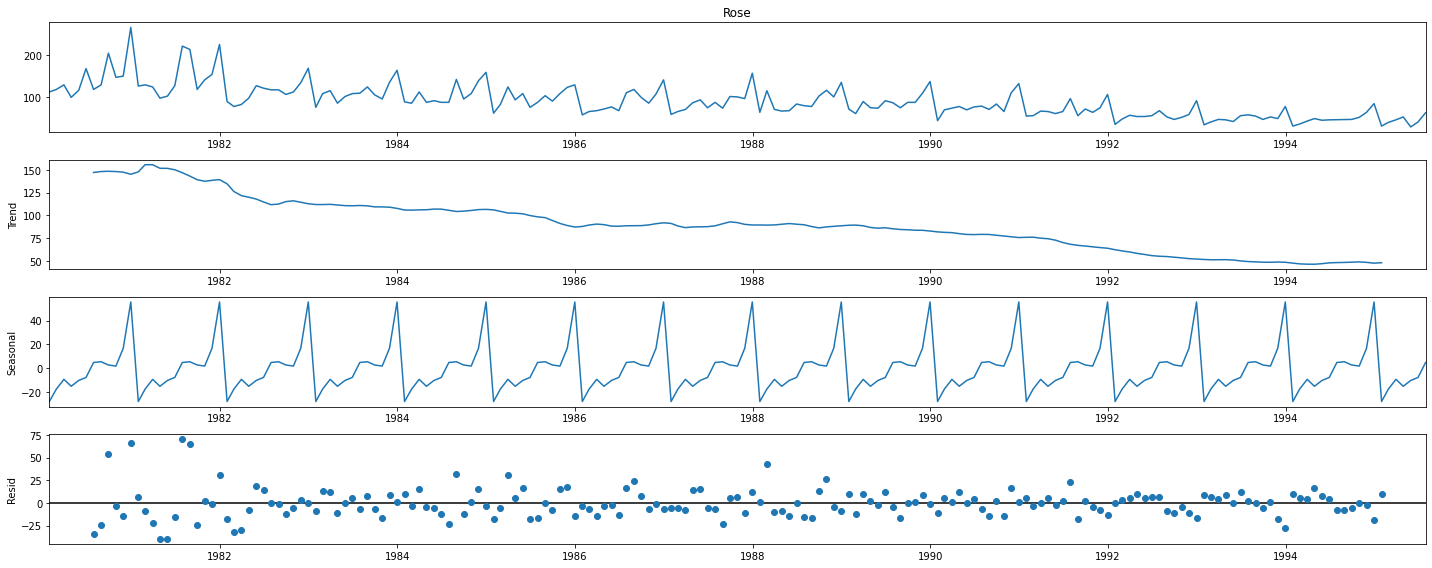

In [33]:
decomposition = seasonal_decompose(dfr['Rose'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1

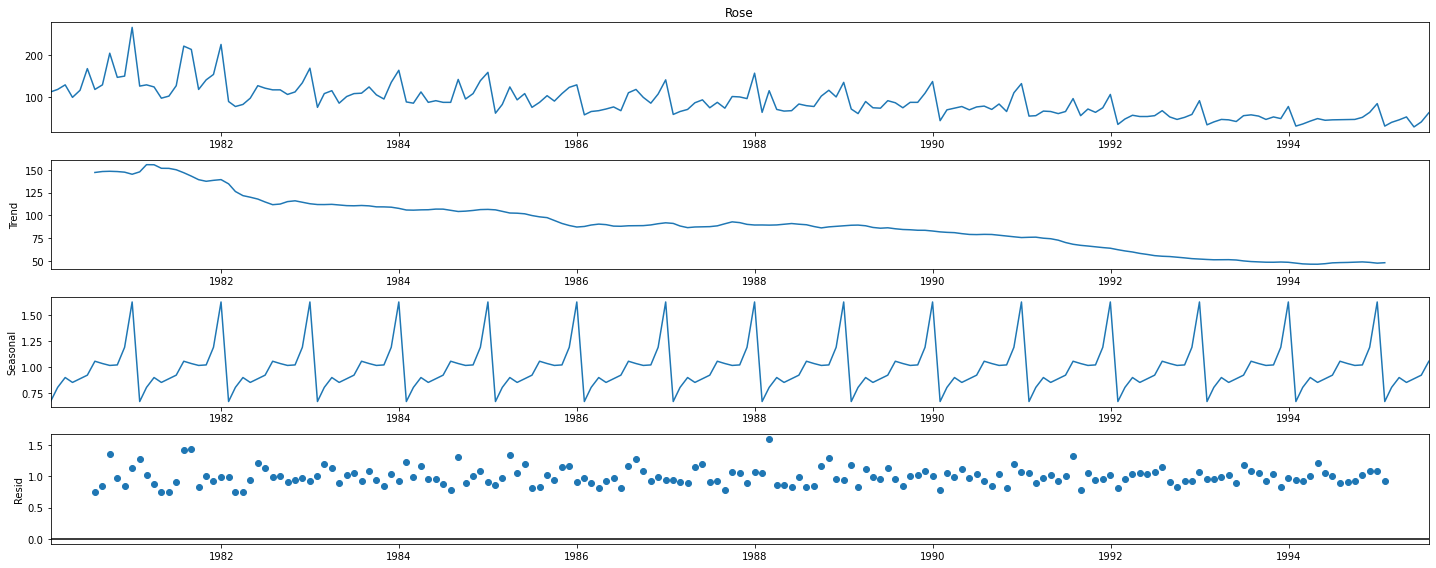

In [35]:
decomposition = seasonal_decompose(dfr['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [36]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
F

3. Split the data into training and test. The test data should start in
1991.

Split the data into train and test and plot the training and test data.

Training Data is till the end of 1991. Test Data is from the beginning of 1992 to the last time stamp
provided.

In [37]:
train=dfr[dfr.index.year < 1991]
test=dfr[dfr.index.year >= 1991]

In [38]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [39]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [40]:
len(train)

132

In [41]:
len(test)

55

4. Build various exponential smoothing models on the training
data and evaluate the model using RMSE on the test data. Other
models such as regression,naïve forecast models, simple average
models etc. should also be built on the training data and check
the performance on the test data using RMSE.

Model 1: Linear Regression


For this particular linear regression, we are going to regress the 'Rose' variable against the order of the
occurrence. For this we need to modify our training data before fitting it into a linear regression.


In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to
build the model on the training data and test the model on the test data.

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

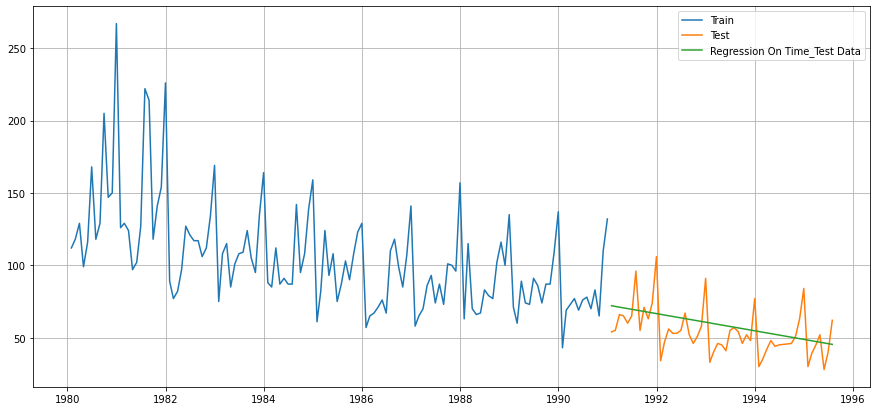

In [48]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(15,7))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Model Evaluation


In [49]:
from sklearn import metrics
import pandas as pd

## Train Data - MAPE & RMSE
import math
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model
print(f"For RegressionOnTime forecast on the Train Data, RMSE is {rmse_model1_train}")

## Test Data - MAPE & RMSE
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,s
print(f"For RegressionOnTime forecast on the Train Data, RMSE is {rmse_model1_test}")

resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$
For this particular naive model, we say that the prediction for tomorrow is the same as today and the
prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as
today,therefore the prediction for day after tomorrow is also today.

In [63]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))
NaiveModel_train['naive'].head()

NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-
NaiveModel_test['naive'].head()

plt.figure(figsize=(22,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

## Train Data - MAPE & RMSE
import math
rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive
print(f"For Naive forecast on the Train Data, RMSE is {rmse_model2_train}")

## Test Data - MAPE & RMSE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],
print(f"For Naive forecast on the Train Data, RMSE is {rmse_model2_test}")

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf.sort_values(by=['Test RMSE'])


Method 3: Simple Average
For this particular simple average method, we will forecast by using the average of the training values

In [70]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [71]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


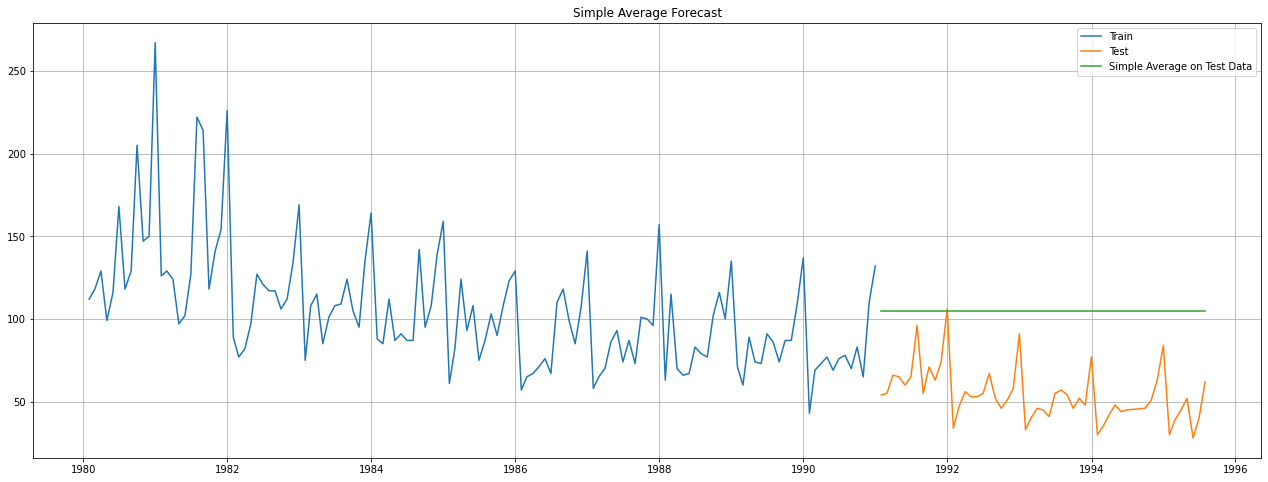

In [72]:
plt.figure(figsize=(22,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();


## Test Data - RMSE 
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_
print(f"For SimpleAverage forecast on the Train Data, RMSE is {rmse_model3_test}")


resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverage']
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf.sort_values(by=['Test RMSE'])


Method 4: Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different
intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.


For Moving Average, we are going to average over the entire data.


In [75]:
MovingAverage = dfr.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [76]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head(10)


,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667


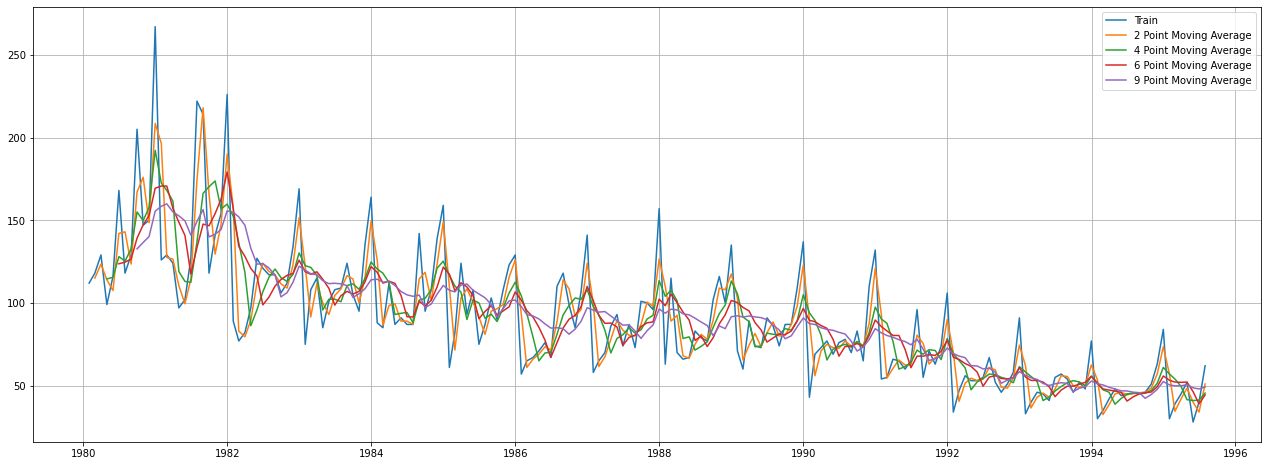

In [77]:
## Plotting on the whole data
plt.figure(figsize=(22,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();


Let us split the data into train and test and plot this Time Series. The window of the moving average is need to
be carefully selected as too big a window will result in not having any test set as the whole series might get
averaged over.


In [79]:
MovingAverage

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
...,...,...,...,...,...
1995-03-31,45.0,42.0,49.50,52.000000,49.888889
1995-04-30,52.0,48.5,41.50,52.166667,50.629630
1995-05-31,28.0,40.0,41.00,46.333333,48.666667


In [80]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving 
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving 
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving A
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving A
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving 
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving 
plt.legend(loc = 'best')
plt.grid();

Model Evaluation
Done only on the test data

## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_
print(f"For 2 point Moving Average Model forecast on the Train Data, RMSE is {rmse_
## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_
print(f"For 4 point Moving Average Model forecast on the Train Data, RMSE is {rmse_
## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_
print(f"For 6 point Moving Average Model forecast on the Train Data, RMSE is {rmse_
## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_
print(f"For 9 point Moving Average Model forecast on the Train Data, RMSE is {rmse_

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
 ,rmse_model4_test_6,rmse_model4_test_9]
 }
 ,index=['2pointTrailingMovingAverage','4pointTrailingMovi
 ,'6pointTrailingMovingAverage','9pointTrailingMov
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf.sort_values(by=['Test RMSE'])


Before we go on to build the various Exponential Smoothing models, let us plot
all the models and compare the Time Series plots.

## Plotting on both Training and Test data
plt.figure(figsize=(22,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving A
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();


Method 5: Simple Exponential Smoothing

Method 5: Simple Exponential Smoothing

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Rose'])

model_SES_autofit = model_SES.fit(optimized=True)

model_SES_autofit.params

SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predi
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for $\alpha$ = 0.098 : Simple Exponential Smoothing


## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict']
print(f'For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Dat


resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,S
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf.sort_values(by=['Test RMSE'])


Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That
means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha
on the test set.

## First we will define an empty dataframe to store our values from the loop
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6


for i in np.arange(0.1,1,0.1):
 model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=Tr
 SES_train['predict',i] = model_SES_alpha_i.fittedvalues
 SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
 
 rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['pr
 
 rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predi
 resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_trai
 ,'Test RMSE':rmse_model5_test_i}, ignore_index
#SES_test.isnull().sum()

Model Evaluation


resultsDf_6

## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predi
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing pr
plt.legend(loc='best')
plt.grid();

resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]


resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']
 ,index=['Alpha=0.1,SimpleExponentialSmoothing'])
#resultsDf_6_1 
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf.sort_values(by=['Test RMSE'])


Method 6: Double Exponential Smoothing (Holt's Model)


Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in
this model.

In [88]:
DES_train = train.copy()
DES_test = test.copy()


model_DES = Holt(DES_train['Rose'])

model_DES_autofit = model_DES.fit()

model_DES_autofit.params

DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test['predict'].head()

## Test Data
rmse_model_des_autofit = metrics.mean_squared_error(DES_test['Rose'],DES_test['predi
print(f'For Alpha = 5.271626142148799e-08 and Beta = 2.581003547020515e-09 Double Ex


resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model_des_autofit]},index=['Alpha =
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf.sort_values(by=['Test RMSE'])

## First we will define an empty dataframe to store our values from the loop
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test
resultsDf_7

for i in np.arange(0.1,1.1,0.1):
 for j in np.arange(0.1,1.1,0.1):
 model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,opti
 DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
 DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
 
 rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['
 
 rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['pre
 resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RM
 'Test RMSE':rmse_model6_test}, ignore_inde


resultsDf_7

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.


resultsDf_7.sort_values(by=['Test RMSE']).head()


## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict'], label='Alpha = 5.271626142148799e-08 and Beta = 2.5810
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialS
plt.legend(loc='best')
plt.grid();


resultsDf_7_2 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']
 ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_2])
resultsDf.sort_values(by=['Test RMSE'])


Method 7: Triple Exponential Smoothing (Holt - Winter's
Model)


Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and
Seasonality are accounted for in this model.


In [92]:
TES_train = train.copy()
TES_test = test.copy()


model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multip

model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multip

model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multip

## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()


## Plotting on both the Training and Test using autofit
plt.figure(figsize=(22,8))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.06385496671075688,Beta=0.054339412
plt.legend(loc='best')
plt.grid();


## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_pred
print("For Alpha=0.06385496671075688,Beta=0.054339412544817035,Gamma=2.2153559567160


resultsDf_8_1 = pd.DataFrame({'Test RMSE': rmse_model6_test_1}
 ,index=['Alpha=0.06385496671075688,Beta=0.054339412544817
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf.sort_values(by=['Test RMSE'])

## First we will define an empty dataframe to store our values from the loop
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'
resultsDf_8_2


for i in np.arange(0.1,1.1,0.1):
 for j in np.arange(0.1,1.1,0.1):
 for k in np.arange(0.1,1.1,0.1):
 model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=
 TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
 TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
 
 rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_tra
 
 rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test[
 
 resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'
 'Train RMSE':rmse_model8_train,'Te
 , ignore_index=True)

resultsDf_8_2


resultsDf_8_2.sort_values(by=['Test RMSE']).head()

## Plotting on both the Training and Test data using brute force alpha, beta and gam
plt.figure(figsize=(22,8))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['auto_predict'], label='Alpha=0.06385496671075688,Beta=0.054339412
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=1.0,Beta=0.2,Gamma=0.2,Tri
plt.legend(loc='best')
plt.grid();


resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE
 ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSm
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf.sort_values(by=['Test RMSE'])

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to
work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However,
since this was a model building exercise we had gone on to build different models on the data and have
compared these model with the best RMSE value on the test data.


We see that the best model is the Triple Exponential Smoothing with
multiplicative seasonality with the parameters $\alpha$ = 0.4, $\beta$ = 0.1 and
$\gamma$ = 0.2.


## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing pr
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialS
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=1.0,Beta=0.1,Gamma=0.4,Tri
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');


In this particular we have built several models and went through a model building exercise. This particular
exercise has given us an idea as to which particular model gives us the least error on our test set for this data.
But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we
need to build the model on the whole data. Remember, the training data that we have used to build the model
stops much before the data ends. In order to forecast using any of the models built, we need to build the
models again (this time on the complete data) with the same parameters.


5. Check for the stationarity of the data on which the model is being built on
using appropriate statistical tests and also mention the hypothesis for the
statistical test. If the data is found to be non-stationary, take appropriate steps to
make it stationary. Check the new data for stationarity and comment. Note:
Stationarity should be checked at alpha = 0.05.


Check for stationarity of the whole Time Series data.

In [93]:
## Test for stationarity of the series - Dicky Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
 
 #Determing rolling statistics
 rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
 rolstd = timeseries.rolling(window=7).std() #determining the rolling standard 
 #Plot rolling statistics:
 orig = plt.plot(timeseries, color='blue',label='Original')
 mean = plt.plot(rolmean, color='red', label='Rolling Mean')
 std = plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean & Standard Deviation')
 plt.show(block=False)
 
 #Perform Dickey-Fuller test:
 print ('Results of Dickey-Fuller Test:')
 dftest = adfuller(timeseries, autolag='AIC')
 dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used'
 for key,value in dftest[4].items():
 dfoutput['Critical Value (%s)'%key] = value
 print (dfoutput,'\n')

SyntaxError: invalid syntax (<ipython-input-93-d24460120e12>, line 20)

test_stationarity(dfro['Rose'])


We see that at 5% significant level the Time Series is non-stationary.


Let us take a difference of order 1 and check whether the Time Series is stationary or not.


test_stationarity(dfro['Rose'].diff().dropna())

Plot the Autocorrelation and the Partial Autocorrelation function
plots on the whole data.

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(dfro['Rose'],lags=50)
plot_acf(dfro['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelatio
plt.show()


On the first order difference we got the q value as 2 we will be using this value on the optimum model build


plot_pacf(dfro['Rose'],lags=50,method='ywmle')
plot_pacf(dfro['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autoc
plt.show()


From the above plots, we can say that there seems to be a seasonality in the data.
On the first order difference we got the p value as 4 we will be using this value on the optimum model build


6. Build an automated version of the ARIMA/SARIMA model in which the
parameters are selected using the lowest Akaike Information Criteria (AIC) on
the training data and evaluate this model on the test data using RMSE.

Check for stationarity of the Training Data Time Series.

test_stationarity(train['Rose'])


We see that the series is not stationary at 𝛼 = 0.05.


test_stationarity(train['Rose'].diff(1).dropna())


We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.
Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then
we can use this particular differenced series to train the ARIMA models. We do not need to worry about
stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our
models over there. You can look at other kinds of transformations as part of making the time series stationary
like taking logarithms.

In [98]:
train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [99]:
## The following loop helps us in getting a combination of different parameters of p
## We have kept the value of d as 1 as we need to take a difference of the series to
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
 print('Model: {}'.format(pdq[i]))


Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [100]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC


,param,AIC


from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
 ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
 print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
 ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_ind

In [102]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()


,param,AIC


auto_ARIMA = ARIMA(train['Rose'], order=(3,1,1),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())


Predict on the Test Set using this model and evaluate the model.

predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)


resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
 ,index=['ARIMA(3,1,3)'])
resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf.sort_values(by=['Test RMSE'])


Build an Automated version of a SARIMA model for which the best
parameters are selected in accordance with the lowest Akaike
Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.


plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelati
plt.show()


We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.


Setting the seasonality as 12 for the second iteration of the auto SARIMA
model.

In [105]:
import itertools
p = q = range(0,3)
P=Q=range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
 print('Model: {}{}'.format(pdq[i], model_pdq[i]))


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


import statsmodels.api as sm
for param in pdq:
 for param_seasonal in model_pdq:
 SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
 order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility=False)
 
 results_SARIMA = SARIMA_model.fit(maxiter=1000)
 
 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.ai
 SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AI


SARIMA_AIC.sort_values(by=['AIC']).head()


In [107]:
import statsmodels.api as sm
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
 order=(3, 1, 1),
 seasonal_order=(3, 0, 2, 12),
 enforce_stationarity=False,
enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Wed, 28 Jul 2021   AIC                            774.400
Time:                                         19:19:29   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.127      0.366      0.714      -0.202       0

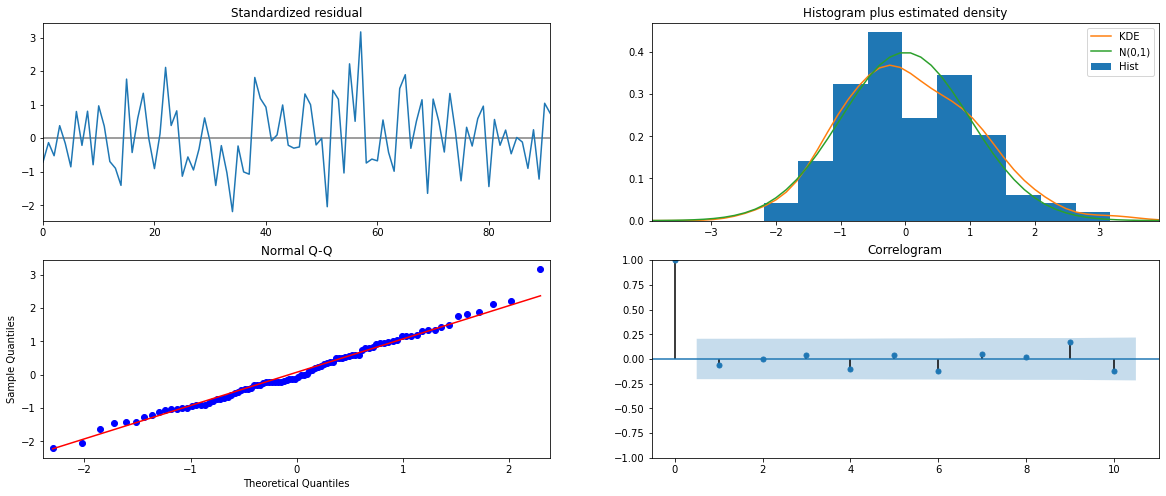

In [108]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that
the model diagnostics plot does not indicate any remaining information that we can get.

Predict on the Test Set using this model and evaluate the
model.


In [109]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))


In [110]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()


y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.234009,13.909036,27.972799,82.495219
1,68.124229,13.992429,40.699572,95.548886
2,67.908860,14.013518,40.442869,95.374851
3,66.787010,14.100798,39.149953,94.424067
4,69.758650,14.110172,42.103222,97.414079


rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squar
print(rmse)


temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
 ,index=['SARIMA(3,1,1)(3,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf.sort_values(by=['Test RMSE'])


7. Build ARIMA/SARIMA models based on the cut-off points of
ACF and PACF on the training data and evaluate this model on the
test data using RMSE.

Let us look at the ACF and the PACF plots once more.

plot_acf(dfro['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelatio
plot_pacf(dfro['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autoc
plt.show();


Here, we have taken alpha=0.05.
The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before
which the PACF plot cuts-off to 4.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the
ACF plot cuts-off to 2.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.


Here, we have taken alpha=0.05.
The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before
which the PACF plot cuts-off to 4.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the
ACF plot cuts-off to 2.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.


We get a comparatively simpler model by looking at the ACF and the PACF plots.


Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input
variable into a 'float64' type variable else Python might throw an error.


Predict on the Test Set using this model and evaluate the
model.

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)


temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
 ,index=['ARIMA(4,1,2)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf.sort_values(by=['Test RMSE'])


We see that there is difference in the RMSE values for both the models, but remember that the second model is
a much simpler model.



Let us look at the ACF and the PACF plots once more.

plot_acf(dfro['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelatio
plot_pacf(dfro['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autoco
plt.show()


We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal
differencing of the original series. Before that let us look at the original series.

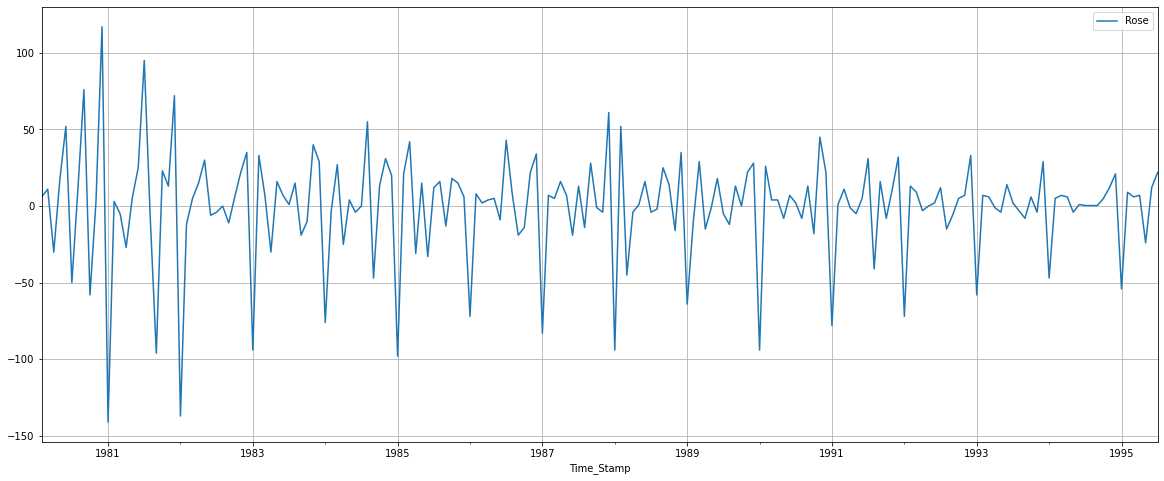

In [116]:
dfr.diff().dropna().plot()
plt.grid();

We see that there is almost no trend present in the data. Seasonality is only present in the data.


Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.


test_stationarity((train['Rose'].diff().dropna()))


Checking the ACF and the PACF plots for the new modified Time Series.

plot_acf((dfro['Rose'].diff().dropna()),lags=50)
plot_pacf((dfro['Rose'].diff().dropna()),lags=50,method='ywmle');


Here, we have taken alpha=0.05.
We are going to take the seasonal period as 12.
We will keep the p(4) and q(2) parameters same as the ARIMA model.
The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after
which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after
which the ACF plot cuts-off to 2


In [118]:
import statsmodels.api as sm
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
 order=(4, 1, 2),
 seasonal_order=(0,0,2,12),
 enforce_stationarity=False,
enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 0, 2, 12)   Log Likelihood                -453.120
Date:                            Wed, 28 Jul 2021   AIC                            924.240
Time:                                    19:27:18   BIC                            948.040
Sample:                                         0   HQIC                           933.882
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1768      0.137      8.601      0.000       0.909       1.445
ar.L2         -0.3863      0.169   

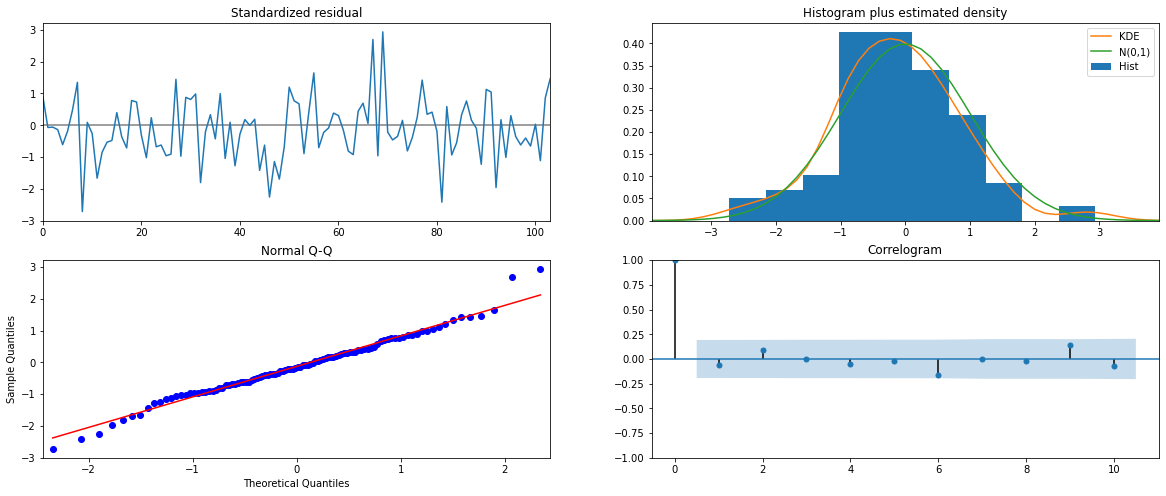

In [119]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()


The model diagnostics plot looks okay.

The model diagnostics plot looks okay.

In [120]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [121]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()


y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,63.017794,17.836904,28.058105,97.977483
1,45.345832,18.148175,9.776063,80.915601
2,70.074032,18.359141,34.090776,106.057287
3,81.128823,18.460432,44.947041,117.310604
4,75.301723,18.461152,39.118531,111.484916


rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squa
print(rmse)

temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
 ,index=['SARIMA(4,1,2)(0,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])


This is where our model building exercise ends.


8. Build a table (create a data frame) with all the models built along with their
corresponding parameters and the respective RMSE values on the test
data


resultsDf.sort_values(by=['Test RMSE'],ascending=True)


9. Based on the model-building exercise, build the most optimum
model(s) on the complete data and predict 12 months into the
future with appropriate confidence intervals/bands.


fullmodel1 = ExponentialSmoothing(dfro['Rose'],
 trend='additive',
seasonal='multiplicative').fit(smoothing_level=0.1
 smoothing_trend=0.2
smoothing_seasonal=

RMSE_fullmodel1 = metrics.mean_squared_error(dfro['Rose'],fullmodel1.fittedvalues,sq
print('RMSE:',RMSE_fullmodel1)


Evaluate the model on the whole and predict 12 months into the
future (till the end of next year).

prediction_1 = fullmodel1.forecast(steps=17)


dfr.plot()
prediction_1.plot();


#In the below code, we have calculated the upper and lower confidence bands at 95% c
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 9
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddo
 'prediction':prediction_1,
'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,dd

# plot the forecast along with the confidence band
axis = dfro.plot(label='Actual', figsize=(22,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], col
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()